In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras as kr
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import talos

import matplotlib.pyplot as plt

In [2]:
# upload & joint
emb = np.load('/root/work/data/emb_stad_32.npy')
label = pd.read_csv('/root/work/data/stad_label')

emb_size = emb.shape[1]
num_classes =len(label['Molecular.Subtype'].value_counts())

In [4]:
# data preprocessing
x = emb

# str -> int
y = np.array(label['Molecular.Subtype'].map({'CIN':0, 'GS':1, 'MSI':2, 'EBV':3}).astype(int))

# int -> onthot
y = kr.utils.to_categorical(y)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(152, 311744) (66, 311744) (152, 4) (66, 4)


In [6]:
from keras.models import load_model

# # 保存训练好的model为hdf5文件
# model.save('/root/work/model/stad_subtype_model.h5')  
# 重新加载模型
model = load_model('/root/work/model/stad_subtype_model.h5')

In [11]:
model = Sequential()
model.add(Dense(1024, input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,kernel_initializer='uniform',activation='softmax'))

model.compile(loss=kr.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [9]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(train)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Epoch 1/50
2/2 [==============================] - 2s 564ms/step - loss: 1.4670 - accuracy: 0.3088 - val_loss: 1.8958 - val_accuracy: 0.1875
Epoch 2/50
2/2 [==============================] - 1s 460ms/step - loss: 0.8895 - accuracy: 0.6397 - val_loss: 2.0326 - val_accuracy: 0.2500
Epoch 3/50
2/2 [==============================] - 1s 445ms/step - loss: 0.3836 - accuracy: 0.8309 - val_loss: 2.0255 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 1s 445ms/step - loss: 0.1892 - accuracy: 0.9412 - val_loss: 2.4795 - val_accuracy: 0.3750
Epoch 5/50
2/2 [==============================] - 1s 451ms/step - loss: 0.1771 - accuracy: 0.9338 - val_loss: 2.4195 - val_accuracy: 0.3125
Epoch 6/50
2/2 [==============================] - 1s 448ms/step - loss: 0.2067 - accuracy: 0.9706 - val_loss: 2.4485 - val_accuracy: 0.3125
Epoch 7/50
2/2 [==============================] - 1s 448ms/step - loss: 0.0353 - accuracy: 0.9926 - val_loss: 3.1181 - val_accuracy: 0.3125
Epoch 8/50
2/2 [====

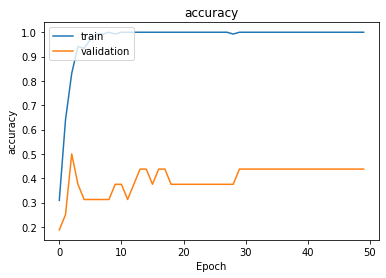

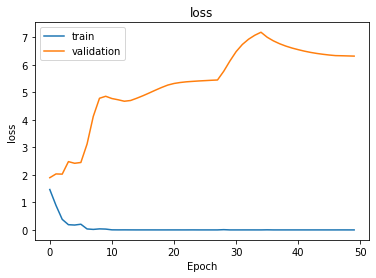

3/3 [==============================] - 0s 41ms/step - loss: 4.0260 - accuracy: 0.4091
test loss:  4.02604866027832
test accuracy:  0.40909090638160706


In [12]:
b = 128
train_history=model.fit(train_x,
                        train_y,
                        epochs=50,
                        validation_split=0.1,
                        batch_size=b)

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)


In [7]:
loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1330 test_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1313 run_step  **
        outputs = model.test_step(data)
    /usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1267 test_step
        y_pred = self(x, training=False)
    /usr/local/lib/python3.6/dist-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.6/dist-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 12411 but received input with shape (None, 311744)
